 Use grabCut to segment the image. Show the final segmentation mask, foreground image, and background image.

 Produce an enhanced image with a substantially blurred background. Display the original image alongside the enhanced image.

Why is the background just beyond the edge of the flower quite dark in the enhanced image?

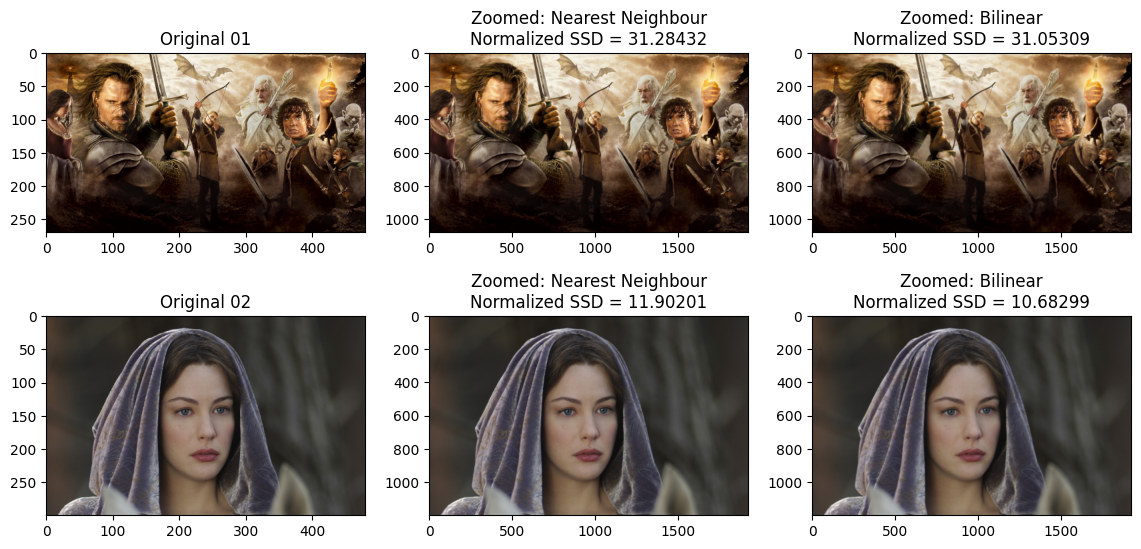

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


def zoom_image(image, zoom_factor, interpolation):
    M, N, c = image.shape
    new_M = int(M * zoom_factor)
    new_N = int(N * zoom_factor)

    if interpolation == cv2.INTER_NEAREST:
        zoomed_image = cv2.resize(image, (new_N, new_M), interpolation=cv2.INTER_NEAREST)

    elif interpolation == cv2.INTER_LINEAR:
        zoomed_image = cv2.resize(image, (new_N, new_M), interpolation=cv2.INTER_LINEAR)

    else:
        try:
            zoomed_image = cv2.resize(image, (new_N, new_M), interpolation=interpolation)
        except:
            raise ValueError('Invalid interpolation method')
    return zoomed_image

# Load images
arwen = cv2.imread('utils/q05/im01.png', cv2.IMREAD_COLOR)
arwen = cv2.cvtColor(arwen, cv2.COLOR_BGR2RGB)

arwen_small = cv2.imread("utils/q05/im01small.png", cv2.IMREAD_COLOR)
arwen_small = cv2.cvtColor(arwen_small, cv2.COLOR_BGR2RGB)

lotr = cv2.imread('utils/q05/im02.png', cv2.IMREAD_COLOR)
lotr = cv2.cvtColor(lotr, cv2.COLOR_BGR2RGB)

lotr_small = cv2.imread('utils/q05/im02small.png', cv2.IMREAD_COLOR)
lotr_small = cv2.cvtColor(lotr_small, cv2.COLOR_BGR2RGB)

# Zooming
arwen_zoomed_nn = zoom_image(arwen_small, 4, cv2.INTER_NEAREST)
arwen_zoomed_bilinear = zoom_image(arwen_small, 4, cv2.INTER_LINEAR)

lotr_zoomed_nn = zoom_image(lotr_small, 4, cv2.INTER_NEAREST)
lotr_zoomed_bilinear = zoom_image(lotr_small, 4, cv2.INTER_LINEAR)

# Calculate SSD
def ssd(original_image, zoomed_image):
    return np.sum(np.square(original_image - zoomed_image)) / original_image.size

arwen_ssd_nn = ssd(arwen, arwen_zoomed_nn)
arwen_ssd_bilinear = ssd(arwen, arwen_zoomed_bilinear)

lotr_ssd_nn = ssd(lotr, lotr_zoomed_nn)
lotr_ssd_bilinear = ssd(lotr, lotr_zoomed_bilinear)

# Plotting
fig, ax = plt.subplots(2, 3, figsize=(14, 6.5))

ax[0, 0].imshow(arwen_small)
ax[0, 0].set_title('Original 01')

ax[0, 1].imshow(arwen_zoomed_nn)
ax[0, 1].set_title('Zoomed: Nearest Neighbour\nNormalized SSD = {:.5f}'.format(arwen_ssd_nn))

ax[0, 2].imshow(arwen_zoomed_bilinear)
ax[0, 2].set_title('Zoomed: Bilinear\nNormalized SSD = {:.5f}'.format(arwen_ssd_bilinear))

ax[1, 0].imshow(lotr_small)
ax[1, 0].set_title('Original 02')

ax[1, 1].imshow(lotr_zoomed_nn)
ax[1, 1].set_title('Zoomed: Nearest Neighbour\nNormalized SSD = {:.5f}'.format(lotr_ssd_nn))

ax[1, 2].imshow(lotr_zoomed_bilinear)
ax[1, 2].set_title('Zoomed: Bilinear\nNormalized SSD = {:.5f}'.format(lotr_ssd_bilinear))

plt.show()